<a href="https://colab.research.google.com/github/MagdaSousa/Estudos_Seaborn/blob/main/rela%C3%A7%C3%A3o_entre_pares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [2]:
dataset = load_breast_cancer()

In [3]:
dataset.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [4]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
list(dataset.target_names)

['malignant', 'benign']

In [9]:
data = np.c_[dataset.data,dataset.target]# a função np.c_ irá concatenar o valor dos atributos previsores, 
#com as classes a serem previstas que dizem se o cancer é maligno ou benigno

In [10]:
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [12]:
columns = np.append(dataset.feature_names,['target'])# adicionar as colunas, e o target que é o objetivo
columns

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype='<U23')

In [13]:
dataset2=pd.DataFrame(data,columns=columns)
dataset2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [14]:
dataset2.shape

(569, 31)

In [35]:
dataset3= dataset2.iloc[:,[0,1,2,3,4,30]]# criando um novo dataset somente com dados atá a coluna 4

In [36]:
dataset3.shape

(569, 6)

In [37]:
dataset3.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,target
0,17.99,10.38,122.80,1001.0,0.11840,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.0


Relacionamentos entre pares

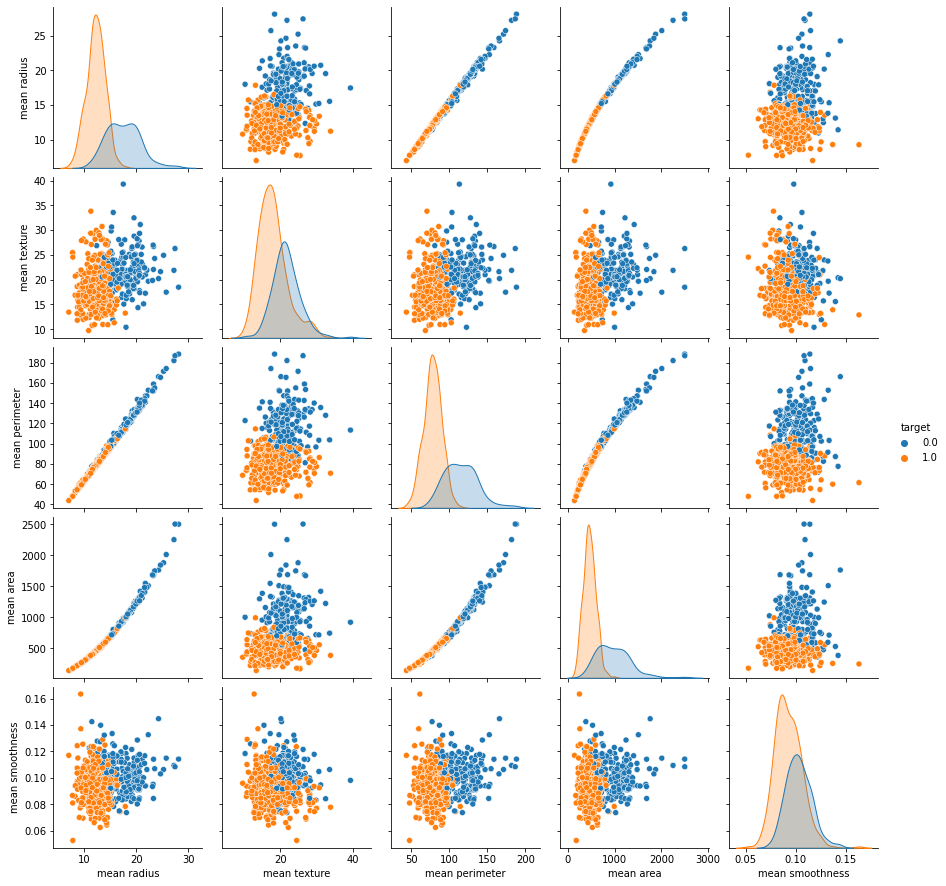

In [38]:
sns.pairplot(dataset3,hue='target');#faz a relação das categorias com a variavel target

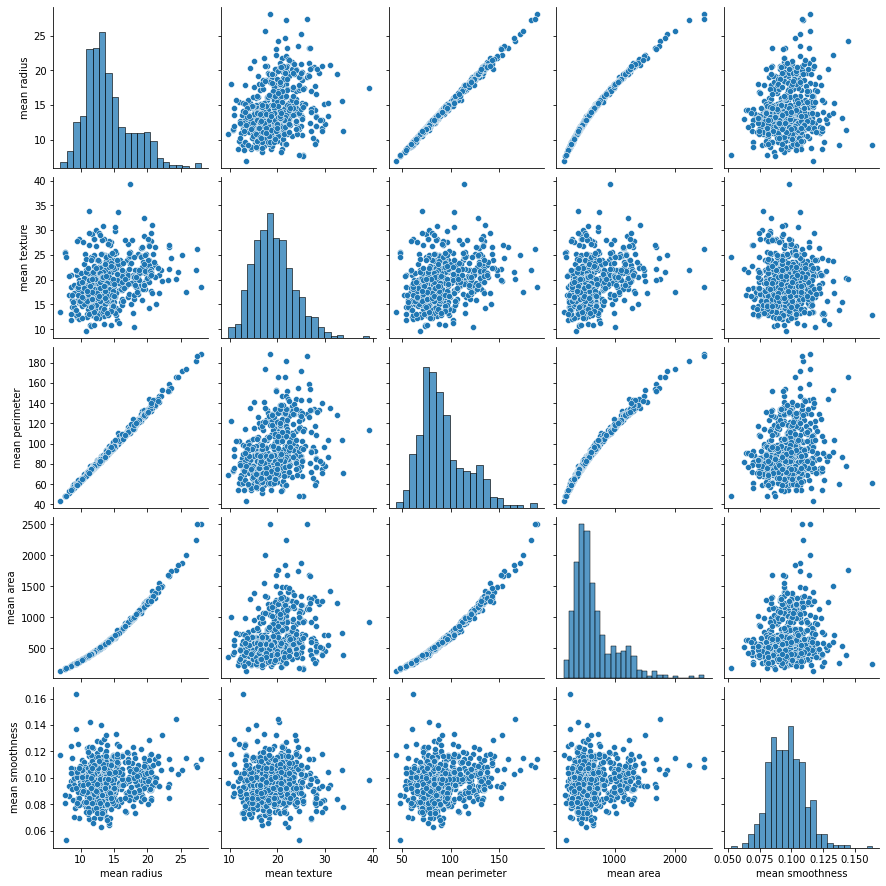

In [19]:
sns.pairplot(dataset3);# comparação entre as categorias ex. mean radius com mean texture e assim por diante

Ao visualizar a relação do mean radius, pecebemos que quanto o maior volume no raio, maior é a área e maior é o perimetro, porém não tem relação com mean texture.

PairGrid

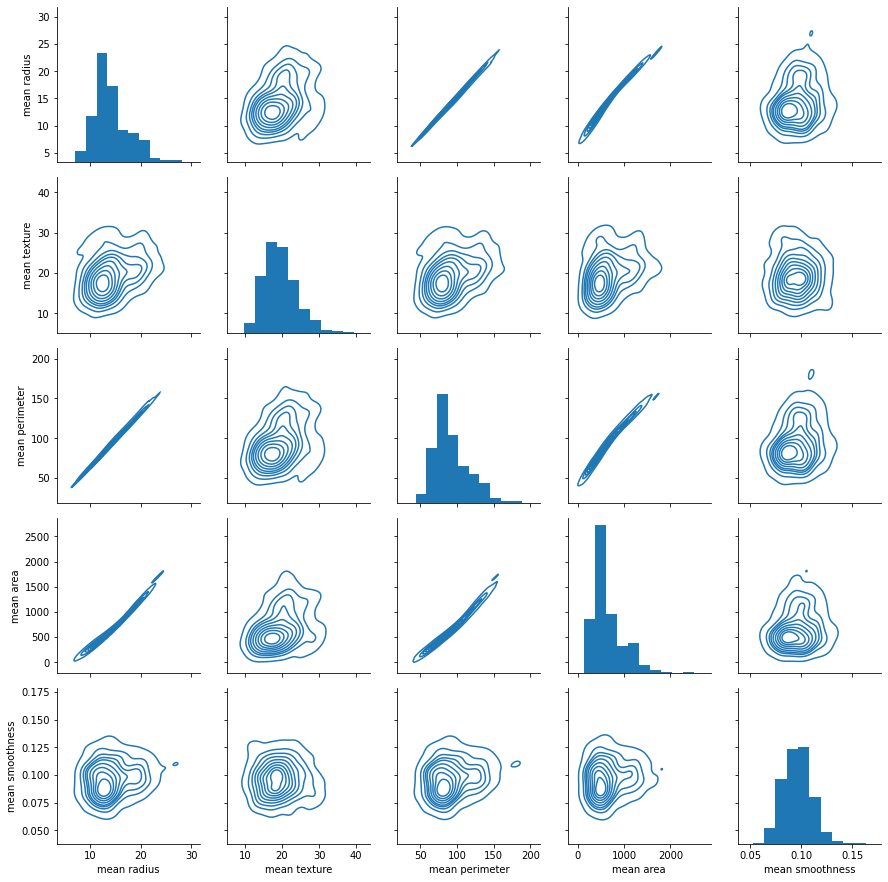

In [28]:
g= sns.PairGrid(dataset3)#gera os gráficos, só que aparecem vazios se executados somente esta estapa
g.map_diag(plt.hist)
#o map_diag é diagonal, quer dizer que vou inserir na diagonal dos gráficos(onde acontece a interceptação de variaveis do mesmo tipo
#)gráficos do tipo histograma
g.map_offdiag(sns.kdeplot)#fora da diagonal gera outro gráfico kdeplot , a parte mais escura mostra onde está a maior parte da distribuição dos dados

In [29]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


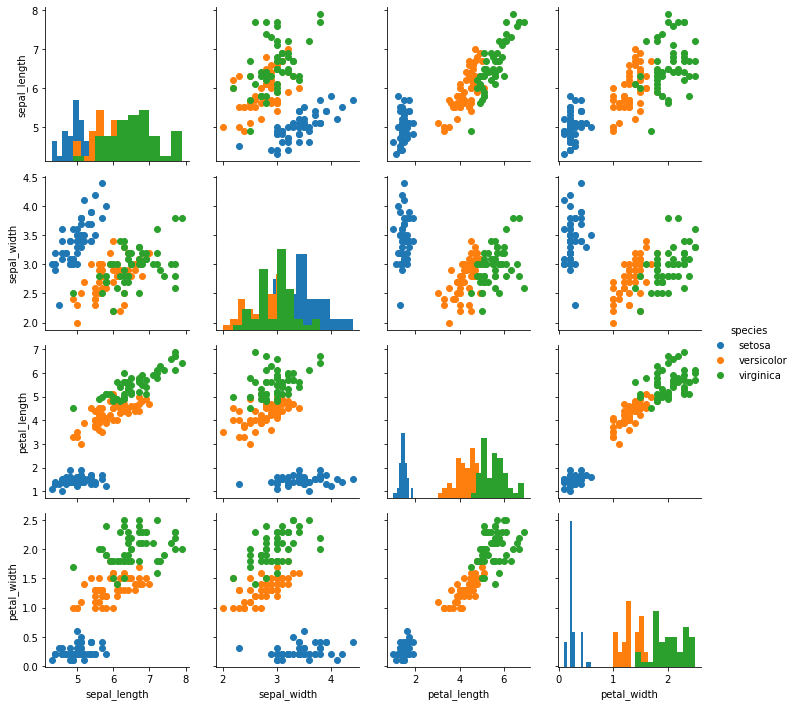

In [33]:
f= sns.PairGrid(iris,hue='species')# hue='species' coloca o histograma das tres especies
f.map_diag(plt.hist)
f.map_offdiag(plt.scatter)
f.add_legend()

TypeError: ignored

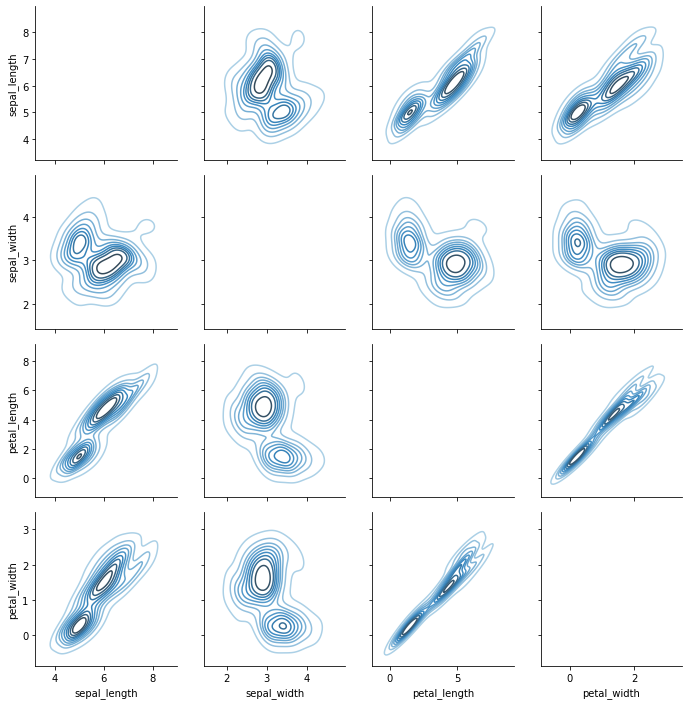

In [44]:
j= sns.PairGrid(iris)
j.map_offdiag(sns.kdeplot, cmap='Blues_d')
j.map_diag(plt.scatter)#verificar erro
